In [1]:
# For EDA
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.preprocessing import LabelEncoder
import warnings

warnings.filterwarnings("ignore", category=FutureWarning, module="seaborn")
warnings.filterwarnings("ignore", category=UserWarning, module="IPython.core.pylabtools")

# For Machine Learning Model
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet, BayesianRidge
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error, r2_score
from xgboost import XGBRegressor
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

# For Deep Learning Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Input, SimpleRNN, LSTM
from tensorflow.keras.optimizers import Adam

2025-01-21 00:22:07.961243: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2025-01-21 00:22:07.961586: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2025-01-21 00:22:08.151218: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [2]:
file_name = '/kaggle/input/temperature-and-ice-cream-sales/Ice Cream Sales - temperatures.csv'
df = pd.read_csv(file_name)

In [3]:
df.head() 

,Temperature,Ice Cream Profits
0,39,13.17
1,40,11.88
2,41,18.82
3,42,18.65
4,43,17.02


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 2 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Temperature        365 non-null    int64  
 1   Ice Cream Profits  365 non-null    float64
dtypes: float64(1), int64(1)
memory usage: 5.8 KB


In [5]:
print("Missing Value (%)")
missing_values = df.isna().mean() * 100
print(missing_values)

print("\nDuplicate Rows (%):")
duplicate_count = df.duplicated().mean()
print(duplicate_count)

Missing Value (%)
Temperature          0.0
Ice Cream Profits    0.0
dtype: float64

Duplicate Rows (%):
0.0027397260273972603


<Axes: xlabel='Temperature', ylabel='Ice Cream Profits'>

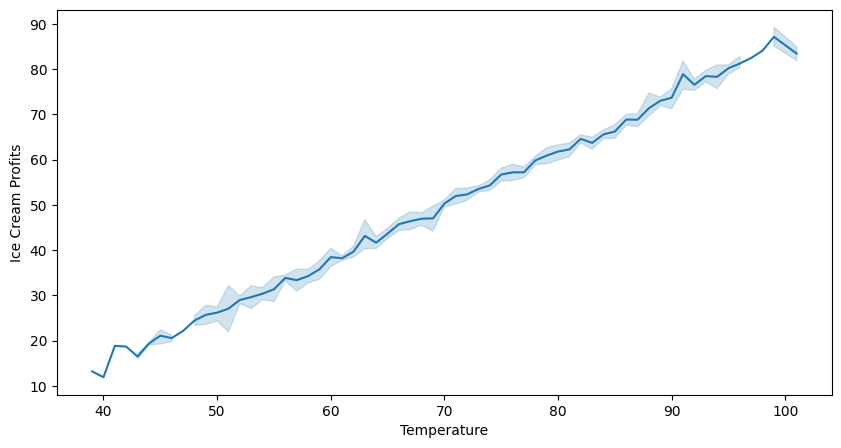

In [6]:
plt.figure(figsize=(10,5)) 
sns.lineplot(x='Temperature', y='Ice Cream Profits', data=df)

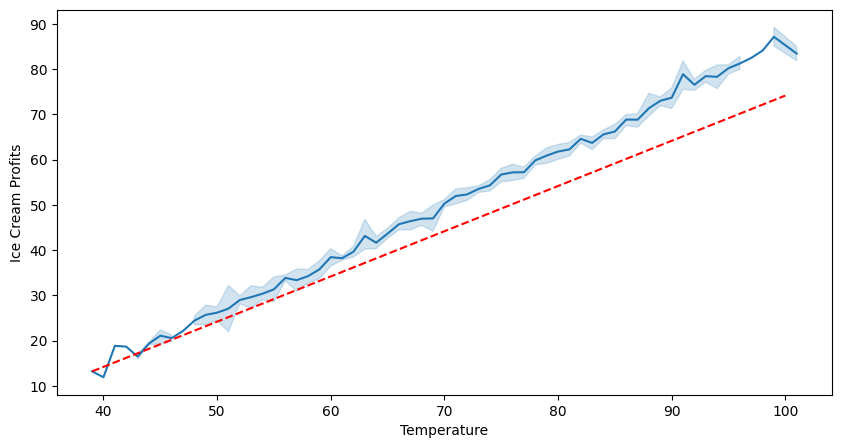

In [7]:
plt.figure(figsize=(10,5))
sns.lineplot(data=df, x='Temperature', y='Ice Cream Profits')

x = np.linspace(39, 100, 100)
y = x - (39 - 13.17)

plt.plot(x, y, color='red', linestyle='--')

plt.show()

In [8]:
X = df.drop('Ice Cream Profits',axis=1) 
y = df['Ice Cream Profits'] 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

models = {
    "Linear Regression": LinearRegression(),
    "ElasticNet": ElasticNet(alpha=0.1, l1_ratio=0.5, max_iter=10000, tol=1e-4),  
    "SVR": SVR(kernel='rbf', C=1.0, epsilon=0.1),
    "KNN": KNeighborsRegressor(n_neighbors=3),
    "Decision Tree": DecisionTreeRegressor(random_state=42),
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42),
    "XGBoost": XGBRegressor(n_estimators=100, random_state=42),
    "Bayesian Ridge": BayesianRidge(),
    "Polynomial Regression": make_pipeline(PolynomialFeatures(degree=2), LinearRegression()),
    "MLP Regressor": MLPRegressor(hidden_layer_sizes=(100, 50), max_iter=500, random_state=42),
}

def evaluate_model(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)  
    y_pred = model.predict(X_test)  

    mse = mean_squared_error(y_test, y_pred)  
    r2 = r2_score(y_test, y_pred)  
    
    return mse, r2

In [9]:
results = {}

for name, model in models.items():
    mse, r2 = evaluate_model(model, X_train_scaled, X_test_scaled, y_train, y_test)
    results[name] = {"MSE": mse, "R²": r2}

results_df = pd.DataFrame(results).T
results_df = results_df.sort_values(by="R²", ascending=False)

results_df

/opt/conda/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


,MSE,R²
MLP Regressor,5.220567,0.983846
Polynomial Regression,5.226164,0.983828
Linear Regression,5.294201,0.983618
Bayesian Ridge,5.294525,0.983617
ElasticNet,6.288901,0.980540
Random Forest,6.531913,0.979788
KNN,6.634852,0.979469
XGBoost,6.669719,0.979362
Decision Tree,6.671418,0.979356
SVR,29.800541,0.907787


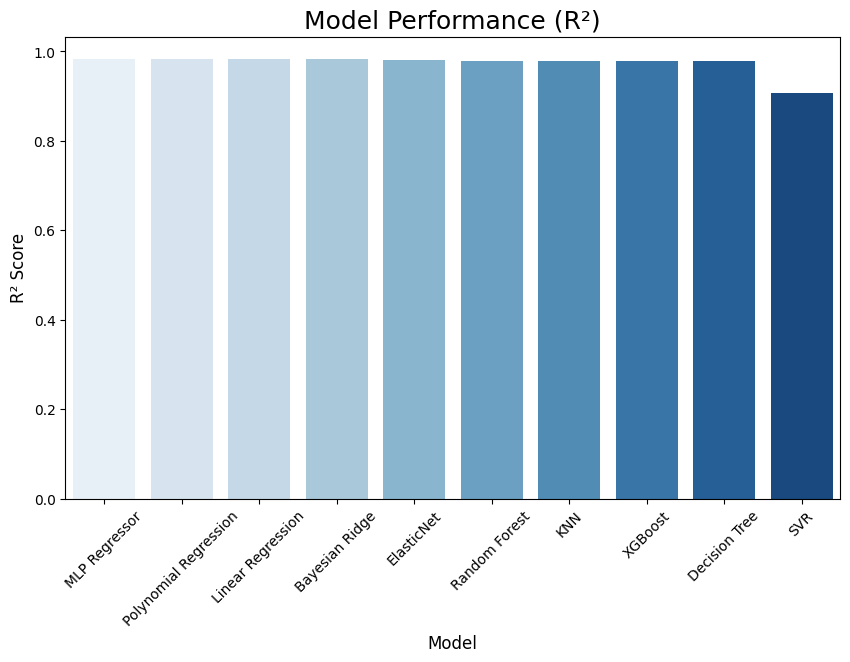

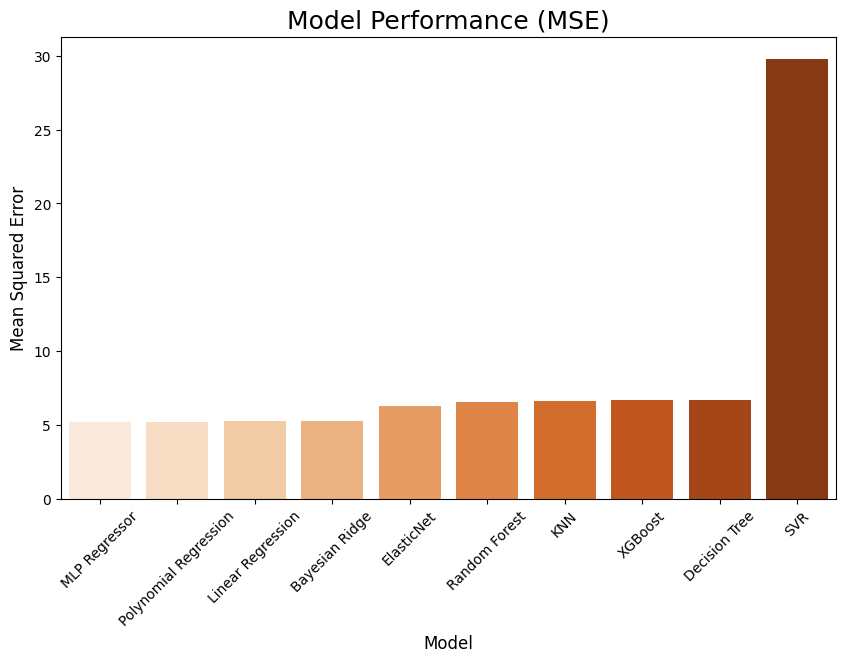

Best Model:
MSE    5.220567
R²     0.983846
Name: MLP Regressor, dtype: float64


In [10]:
plt.figure(figsize=(10, 6))
sns.barplot(x=results_df.index, y="R²", data=results_df, palette="Blues")
plt.title("Model Performance (R²)", fontsize=18)
plt.xlabel("Model", fontsize=12)
plt.ylabel("R² Score", fontsize=12)
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(10, 6))
sns.barplot(x=results_df.index, y="MSE", data=results_df, palette="Oranges")
plt.title("Model Performance (MSE)", fontsize=18)
plt.xlabel("Model", fontsize=12)
plt.ylabel("Mean Squared Error", fontsize=12)
plt.xticks(rotation=45)
plt.show()

best_model = results_df.loc[results_df["R²"].idxmax()]
print("Best Model:")
print(best_model)

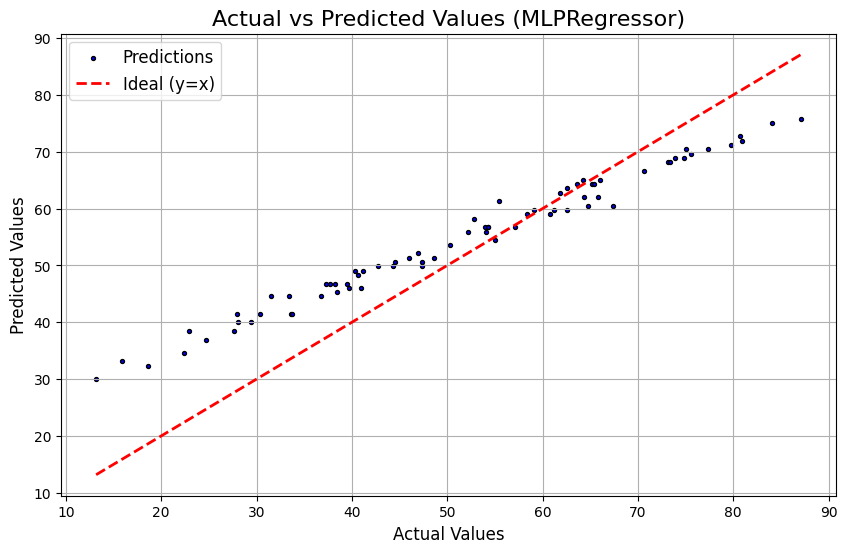

ElasticNet Regression Result: MSE = 57.0569, R² = 0.8234


In [11]:
model =  MLPRegressor(hidden_layer_sizes=(100, 50), max_iter=500, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', s=8, edgecolor='black', label='Predictions')

plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', linewidth=2, label='Ideal (y=x)')

plt.title('Actual vs Predicted Values (MLPRegressor)', fontsize=16)
plt.xlabel('Actual Values', fontsize=12)
plt.ylabel('Predicted Values', fontsize=12)
plt.legend(fontsize=12)
plt.grid()
plt.show()


mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'ElasticNet Regression Result: MSE = {mse:.4f}, R² = {r2:.4f}')